In [2]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import LogFormatterMathtext, ScalarFormatter

import scienceplots
plt.style.use(['science'])

from scipy.fft import ifft, fftfreq, rfftfreq, rfft
from scipy.optimize import curve_fit, least_squares

import re
from pathlib import Path

from IPython.display import display, Markdown 

First, let's look at the time series M(t) data.

In [3]:
def natural_sort_key(s: str):
    """
    Split s into chunks of either
     - float numbers, or
     - non‑numeric substrings.
    This makes sorted(x, key=natural_sort_key) do a numeric sort
    on any embedded decimals.
    """
    parts = re.split(r'(\d+(?:\.\d+)?)', s)
    key = []
    for part in parts:
        if re.fullmatch(r'\d+(?:\.\d+)?', part):
            key.append(float(part))
        else:
            key.append(part)
    return key

In [4]:
folder = Path(r'C:\Users\weidu\OneDrive\Documents\Personal STEM Projects\Quantum_Gases\Brendan_Data\magnetization_time_series\repulsive_detuned')
files = sorted(
    (p.name for p in folder.iterdir() if p.is_file()),
    key=natural_sort_key
)

print(files)
print(f'Number of files: {len(files)}')

pattern = r"Om_#(.*?)_del_"

Ω0_tF_arr_exp = np.array([float(re.search(pattern, f).group(1)) for f in files])
print(Ω0_tF_arr_exp)

['dynam_mag_beta_#4_v_#9.600000e-01_Om_#1.320000e+00_del_#4.800000e-01.txt', 'dynam_mag_beta_#4_v_#9.600000e-01_Om_#2.240000e+00_del_#4.800000e-01.txt', 'dynam_mag_beta_#4_v_#9.600000e-01_Om_#4_del_#4.800000e-01.txt', 'dynam_mag_beta_#4_v_#9.600000e-01_Om_#4.490000e+00_del_#4.800000e-01.txt', 'dynam_mag_beta_#4_v_#9.600000e-01_Om_#5.020000e+00_del_#4.800000e-01.txt', 'dynam_mag_beta_#4_v_#9.600000e-01_Om_#5.680000e+00_del_#4.800000e-01.txt', 'dynam_mag_beta_#4_v_#9.600000e-01_Om_#6.310000e+00_del_#4.800000e-01.txt', 'dynam_mag_beta_#4_v_#9.600000e-01_Om_#6.910000e+00_del_#4.800000e-01.txt', 'dynam_mag_beta_#4_v_#9.600000e-01_Om_#8.590000e+00_del_#4.800000e-01.txt']
Number of files: 9
[1.32 2.24 4.   4.49 5.02 5.68 6.31 6.91 8.59]


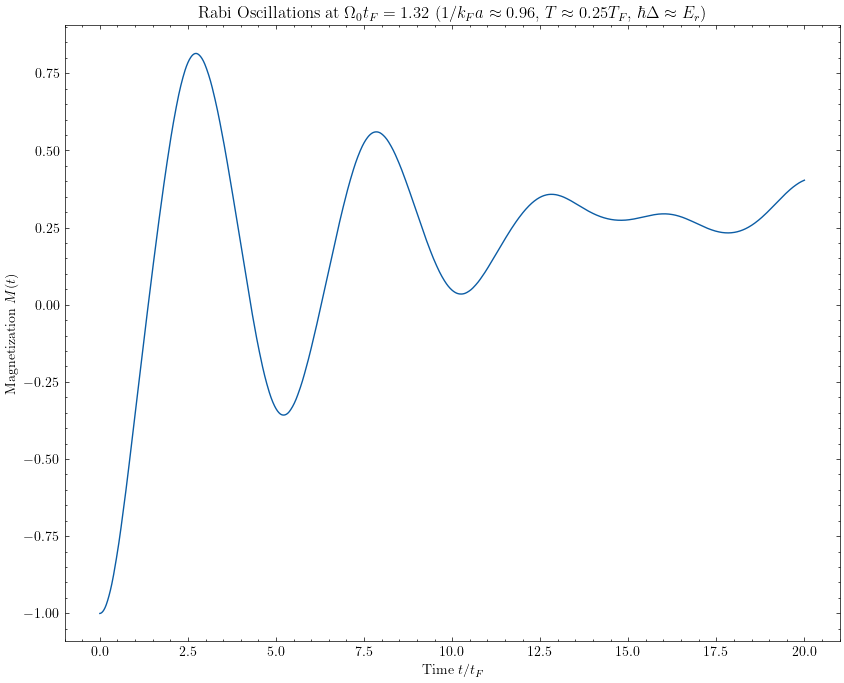

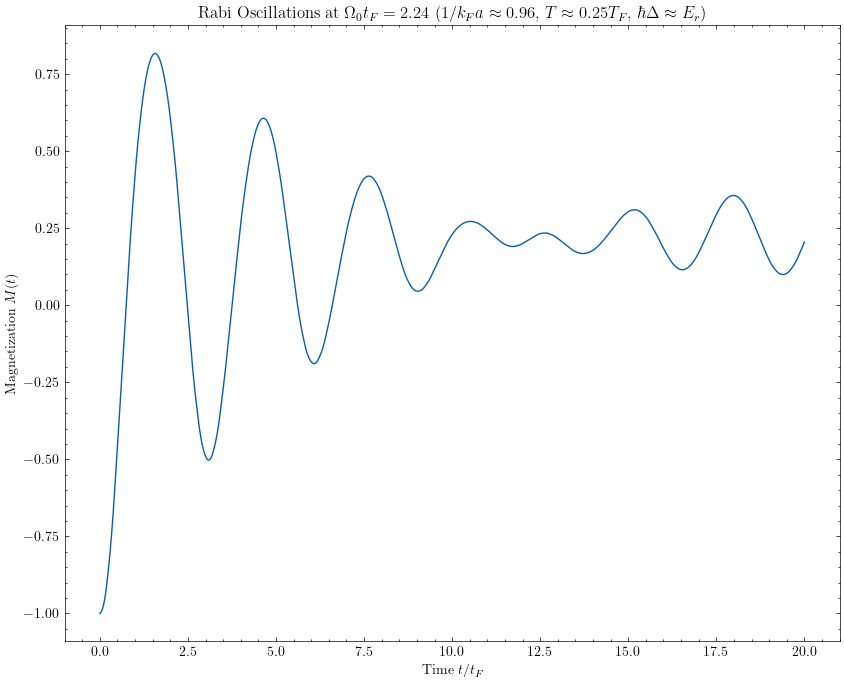

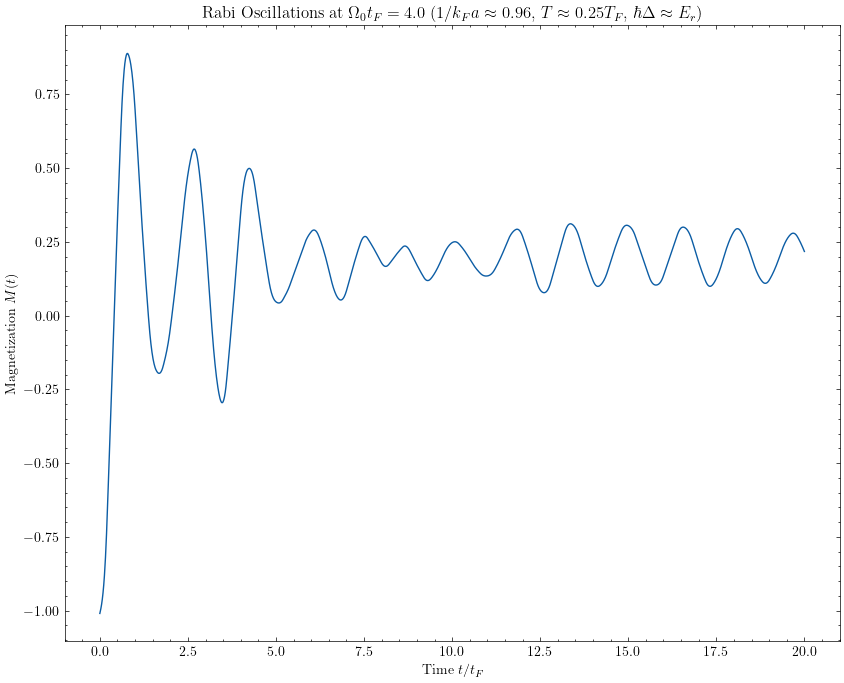

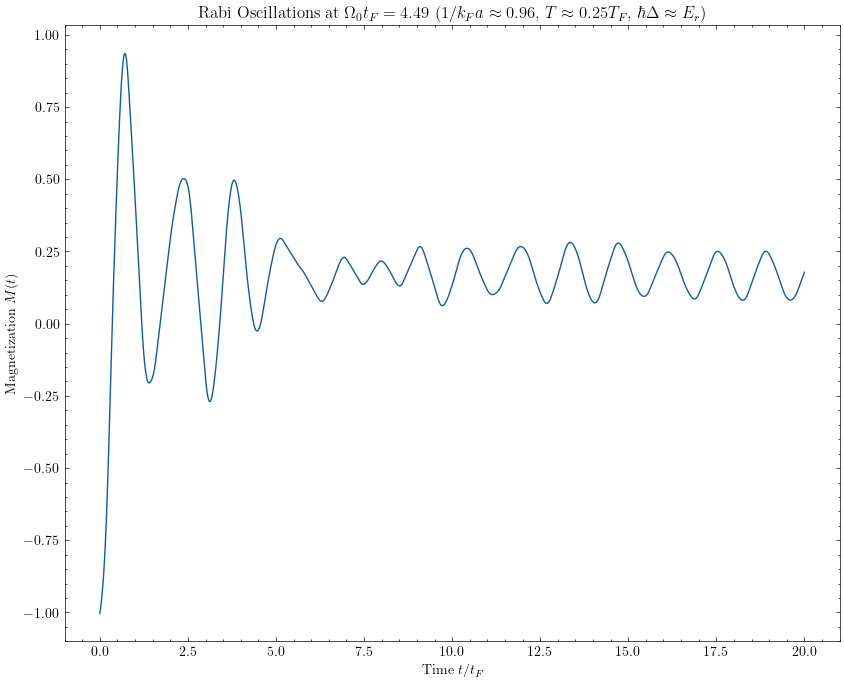

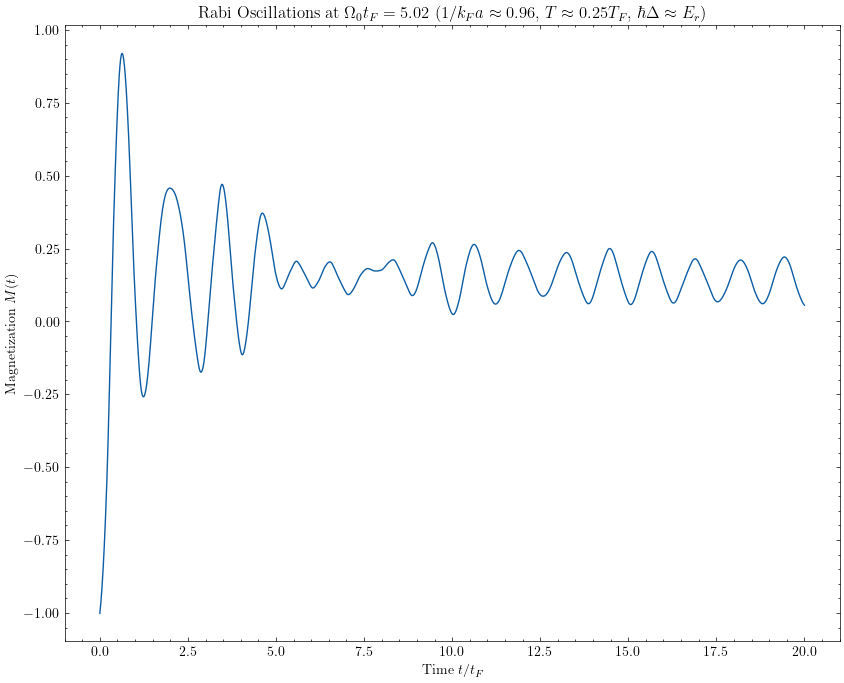

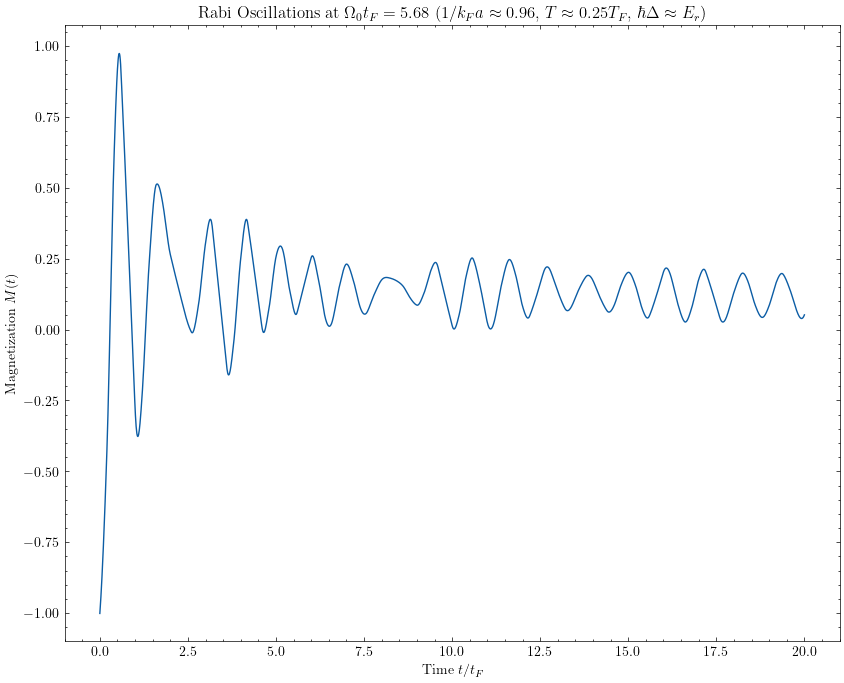

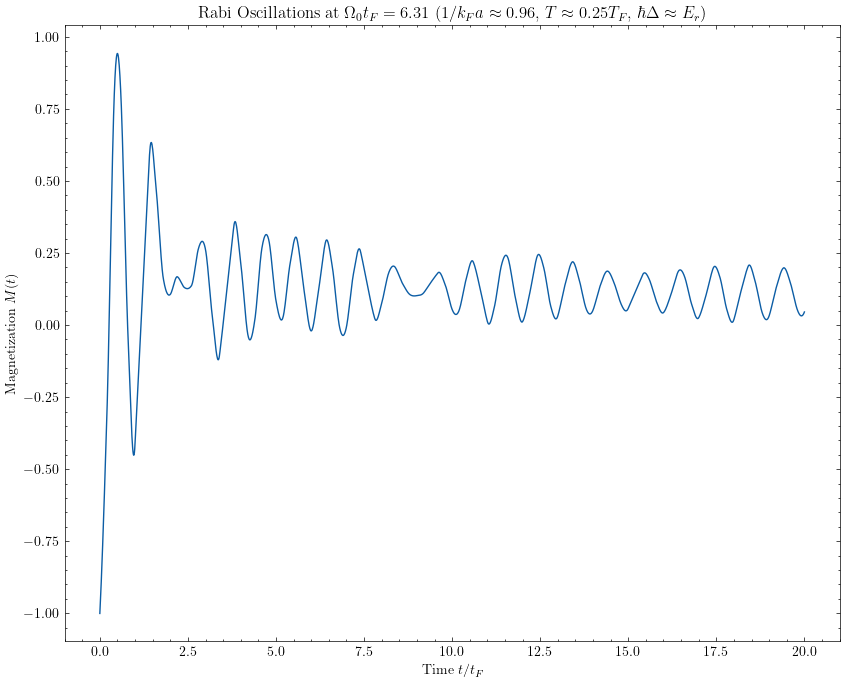

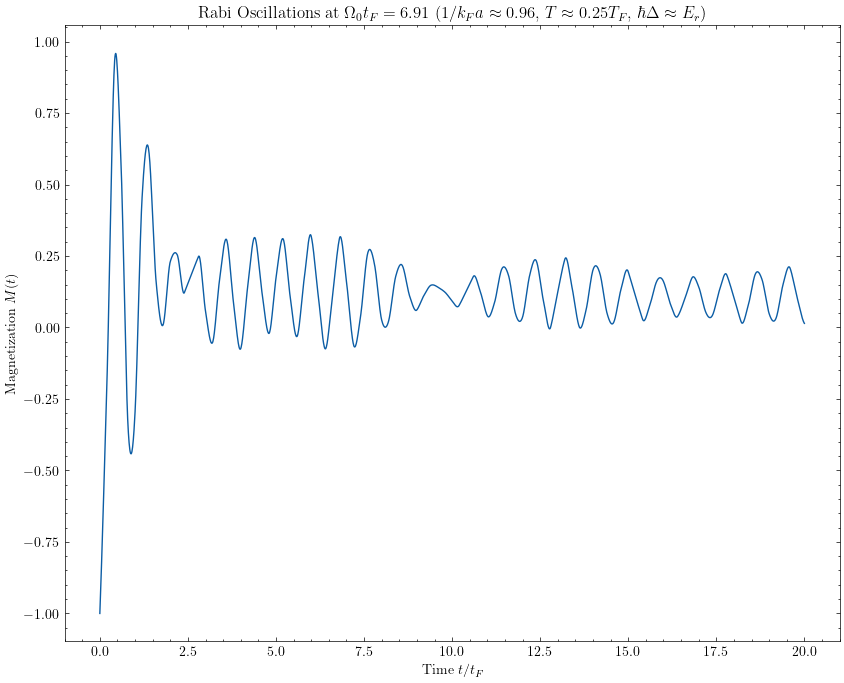

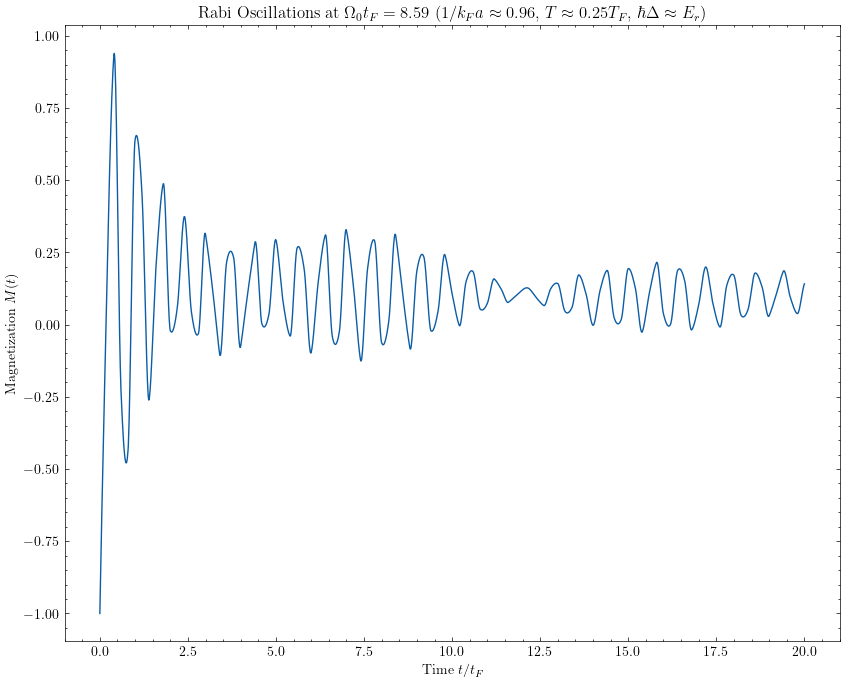

In [ ]:
for i in np.arange(len(files)):
    plt.figure(figsize=(10, 8))
    t_tF, M = np.loadtxt("magnetization_time_series\\repulsive_detuned\\" + files[i], skiprows=0, unpack=True)
    plt.plot(t_tF, M)
    plt.xlabel(r'Time $t/t_F$')
    plt.ylabel(r'Magnetization $M(t)$')
    plt.title(fr'Rabi Oscillations at $\Omega_0 t_F={Ω0_tF_arr_exp[i]}$ ($1/k_{{F}}a\approx 0.96$, $T\approx 0.25T_F$, $\hbar\Delta\approx E_r$)')

In [6]:
Brendan_FT_data = Path(r'C:\Users\weidu\OneDrive\Documents\Personal STEM Projects\Quantum_Gases\Brendan_Data\magnetization_frequency_data')
Brendan_FT_files = sorted(
    (p.name for p in Brendan_FT_data.iterdir() if p.is_file()),
    key=natural_sort_key
)

print(Brendan_FT_files)
print(f"Number of Brendan's FT files: {len(Brendan_FT_files)}")

for i in np.arange(len(Brendan_FT_files)):
    Ω0_tF_files = [f for f in Brendan_FT_files if f.startswith("Omplot_FT")]
    ω_tF_files = [f for f in Brendan_FT_files if f.startswith("wplot_FT")]
    Rabi_heat_map_files = [f for f in Brendan_FT_files if f.startswith("Rd_FT")]

['Omplot_FT_beta_#3.333333e+01_v_#9.600000e-01_del_#-2.376000e+00.dat', 'Omplot_FT_beta_#20_v_#9.600000e-01_del_#5.530000e-01.dat', 'Rd_FT_beta_#3.333333e+01_v_#9.600000e-01_del_#-2.376000e+00.dat', 'Rd_FT_beta_#20_v_#9.600000e-01_del_#5.530000e-01.dat', 'wplot_FT_beta_#3.333333e+01_v_#9.600000e-01_del_#-2.376000e+00.dat', 'wplot_FT_beta_#20_v_#9.600000e-01_del_#5.530000e-01.dat']
Number of Brendan's FT files: 6


(200, 912)
(200, 912)
(200, 912)


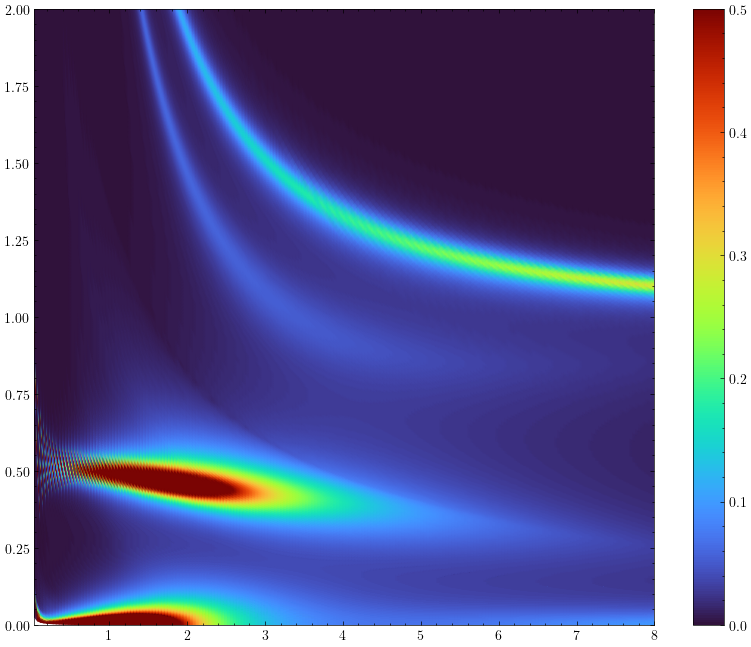

(200, 912)
(200, 912)
(200, 912)


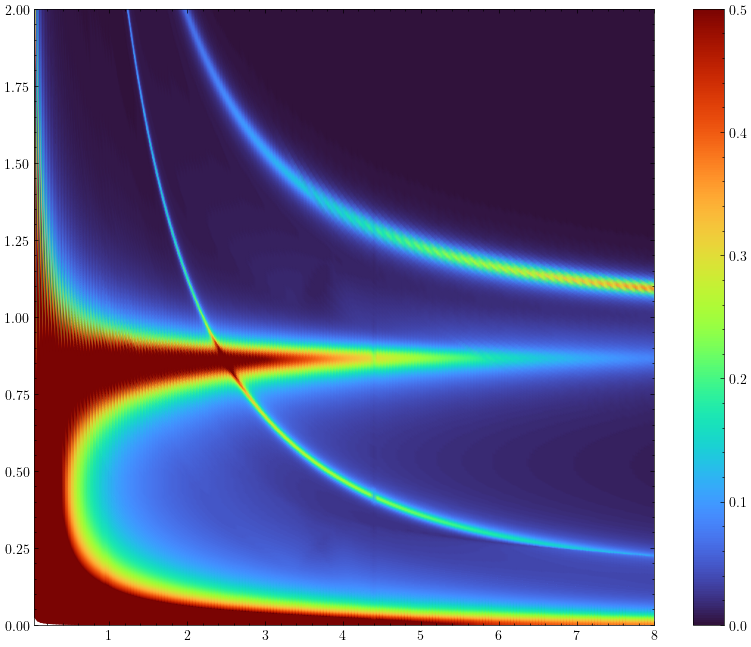

In [7]:
for i in np.arange(len(Ω0_tF_files)):
    plt.figure(figsize = (10, 8))
    Ω0_tF = np.loadtxt("magnetization_frequency_data\\" + Ω0_tF_files[i], unpack=True)
    ω_tF = np.loadtxt("magnetization_frequency_data\\" + ω_tF_files[i], unpack=True)
    R = np.loadtxt("magnetization_frequency_data\\" + Rabi_heat_map_files[i], unpack=True)
    print(Ω0_tF.shape)
    print(ω_tF.shape)
    print(R.shape)
    c = plt.pcolormesh(Ω0_tF, ω_tF/Ω0_tF, R, cmap = 'turbo', shading='gouraud', zorder=-20, vmin=0, vmax=0.5)
    plt.ylim(0, 2)
    plt.colorbar(c)
    plt.show()

Sample uniformly from Brendan's theoretical curves with/without noise, treat that as if it were our experimental FFT, and see if it would be possible to resolve that strange feature?

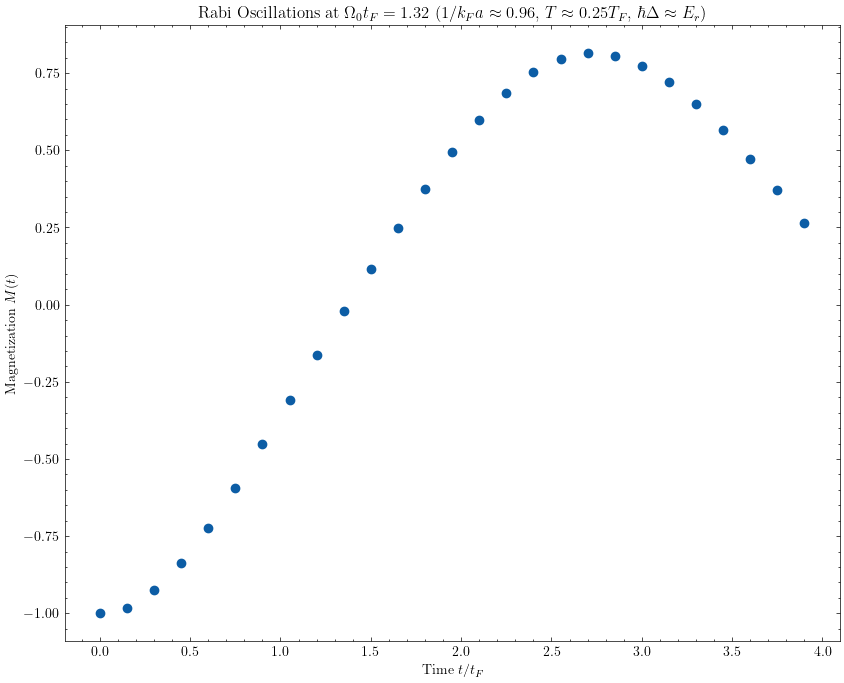

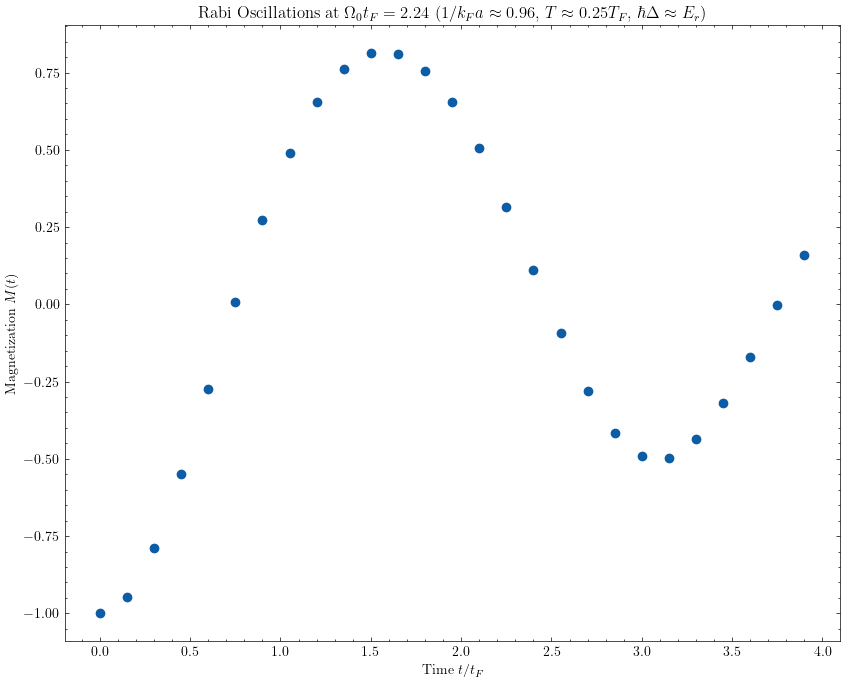

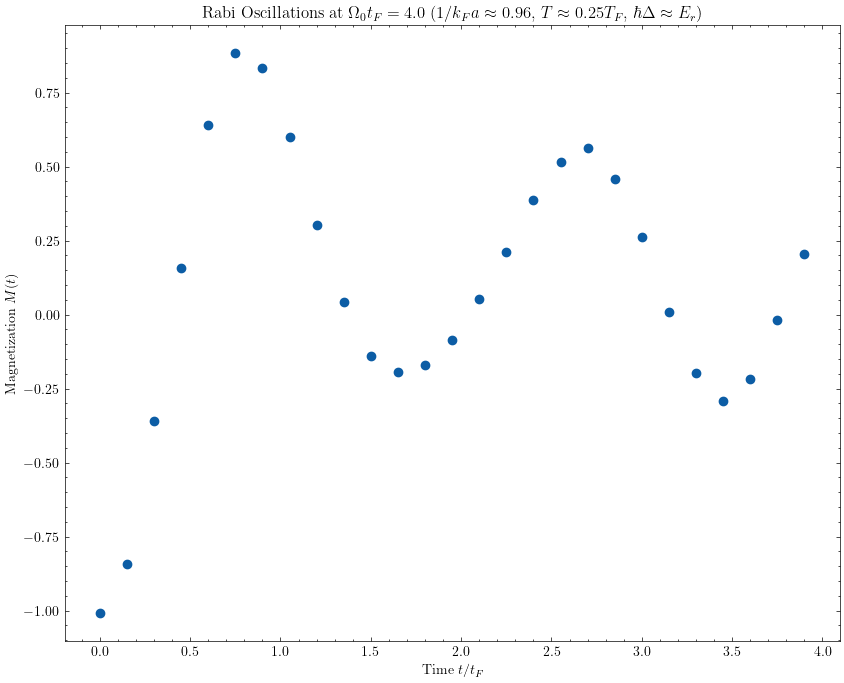

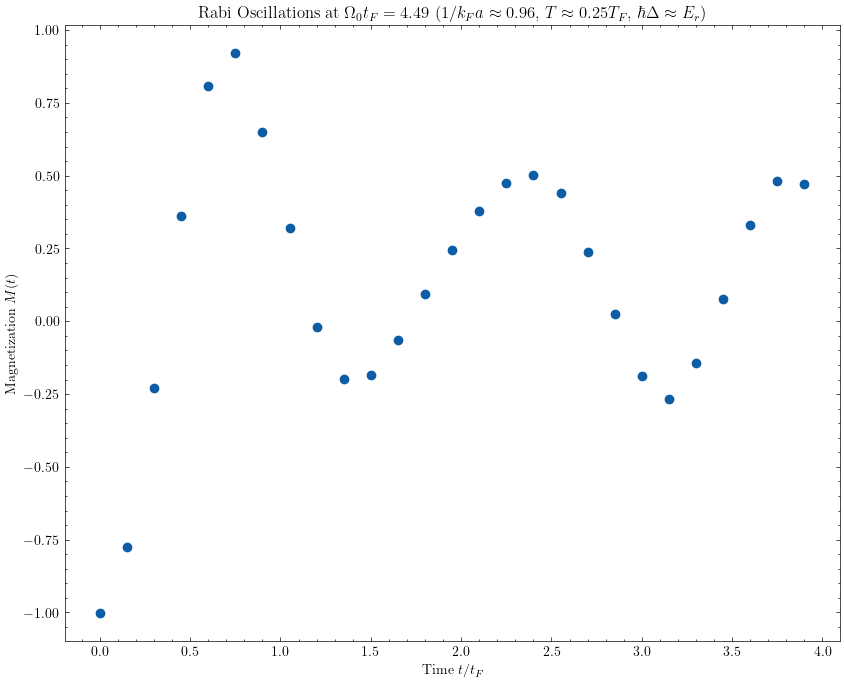

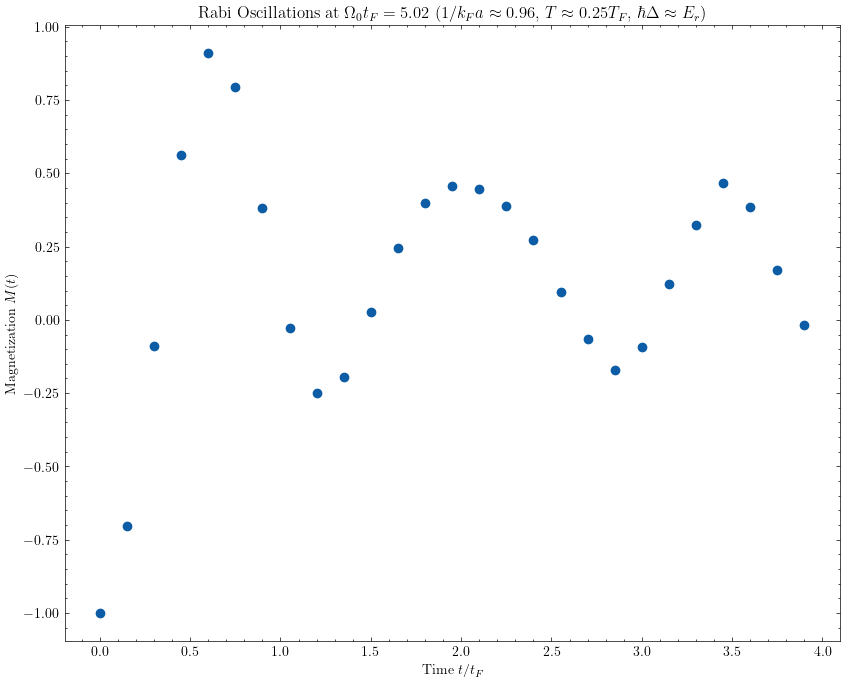

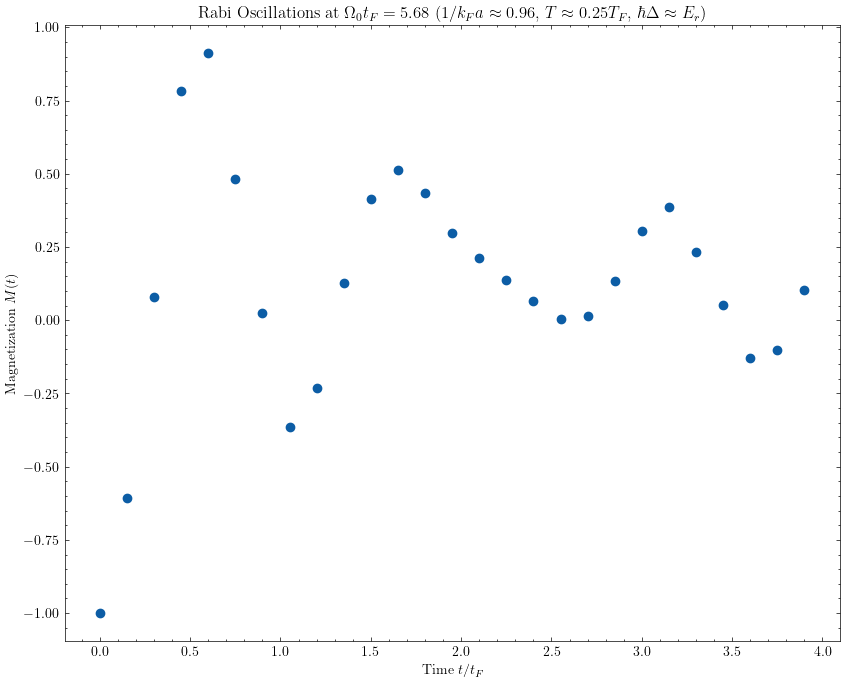

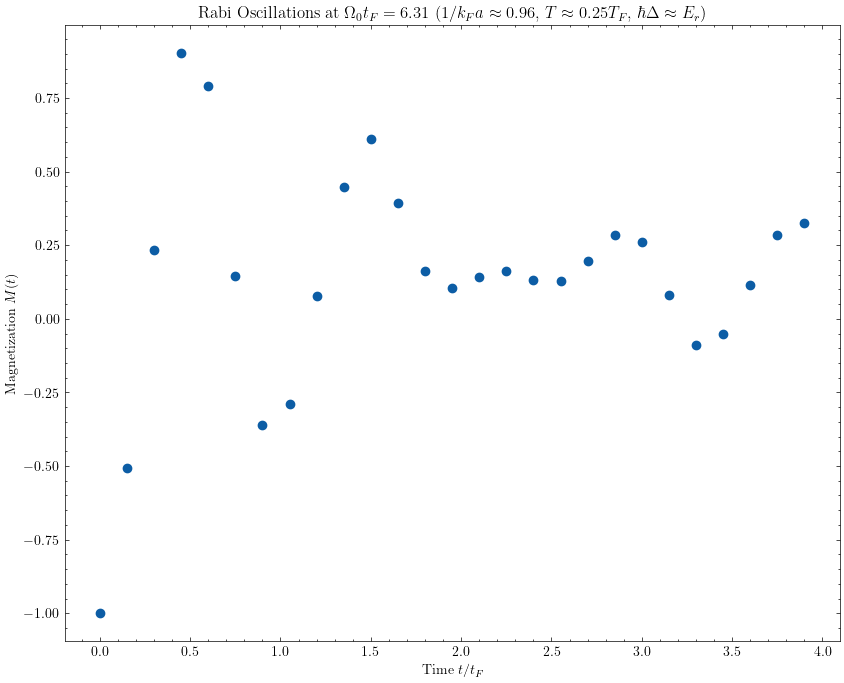

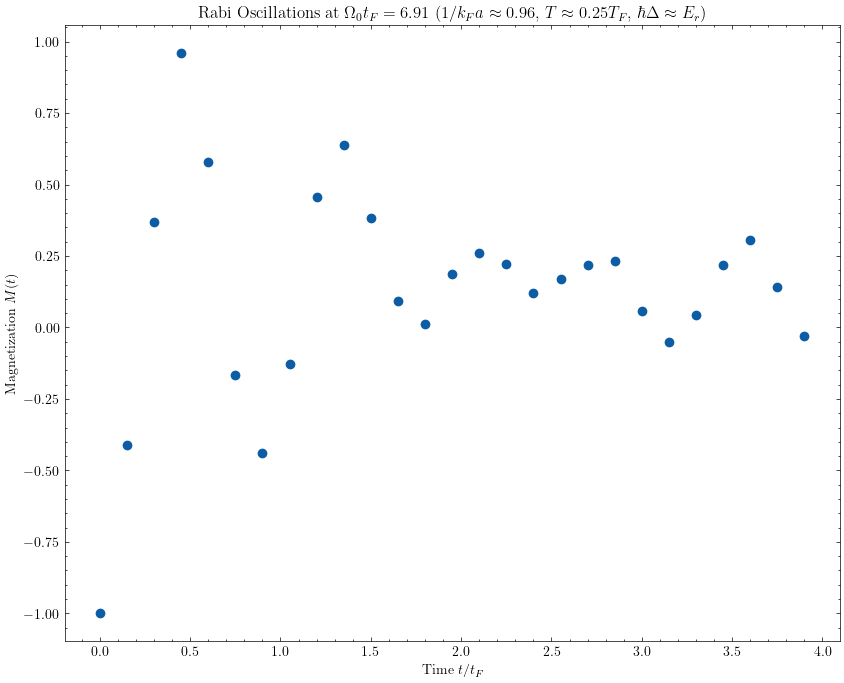

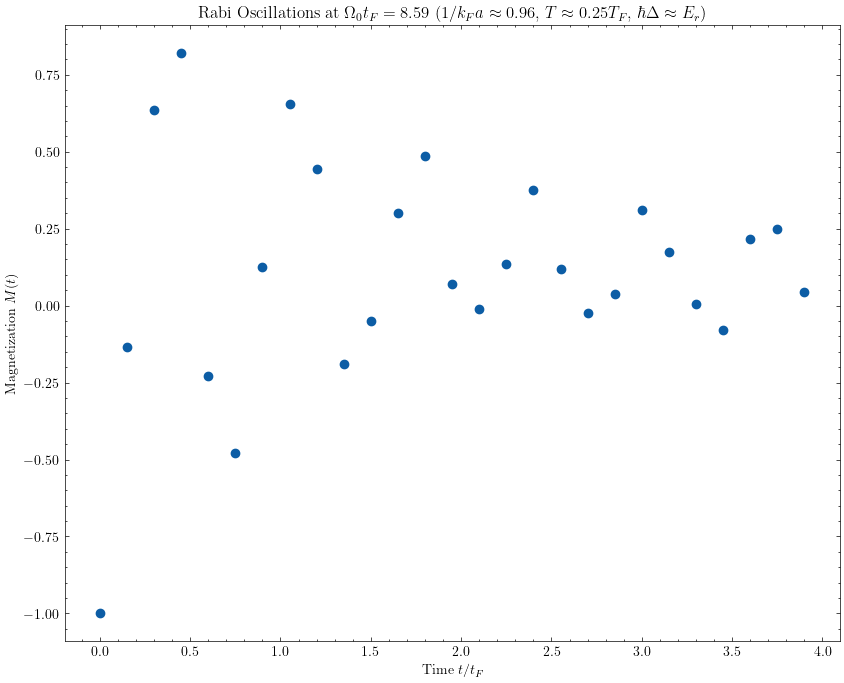

In [8]:
delta_t_tF = 0.153
for i in np.arange(len(files)):
    plt.figure(figsize=(10, 8))
    t_tF, M = np.loadtxt("magnetization_time_series\\repulsive_detuned\\" + files[i], skiprows=0, unpack=True)
    s = int(delta_t_tF/(t_tF[2]-t_tF[1]))
    cg_mask = np.arange(0, len(t_tF), step=s) # conservative estimate here; in the actual experimental data, the sampling time varied from 0.46tF (at
    # the weakest drives) to 0.153tF (at the strongest drives)...is this an issue? Perhaps we should be using the same sampling time 0.153tF for all 
    # Omega_0 values?
    t_cg = t_tF[cg_mask]
    M_cg = M[cg_mask]
    mask_under10 = t_cg < 4   # mask based on original coarse-grained time array
    t_cg = t_cg[mask_under10]
    M_cg = M_cg[mask_under10]
    #M_cg = M_cg + 0.05*np.random.normal(size=len(M_cg)) # add 5% noise to the coarse-grained data to simulate experimental noise
    plt.scatter(t_cg, M_cg)
    plt.xlabel(r'Time $t/t_F$')
    plt.ylabel(r'Magnetization $M(t)$')
    plt.title(fr'Rabi Oscillations at $\Omega_0 t_F={Ω0_tF_arr_exp[i]}$ ($1/k_{{F}}a\approx 0.96$, $T\approx 0.25T_F$, $\hbar\Delta\approx E_r$)')

(14,)
(14,)
(14,)
(14,)
(14,)
(14,)
(14,)
(14,)
(14,)


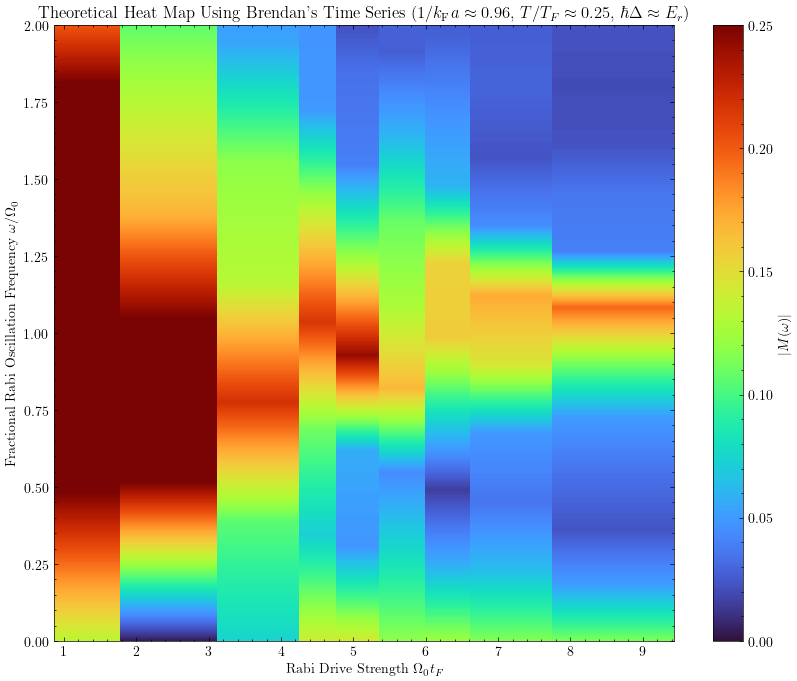

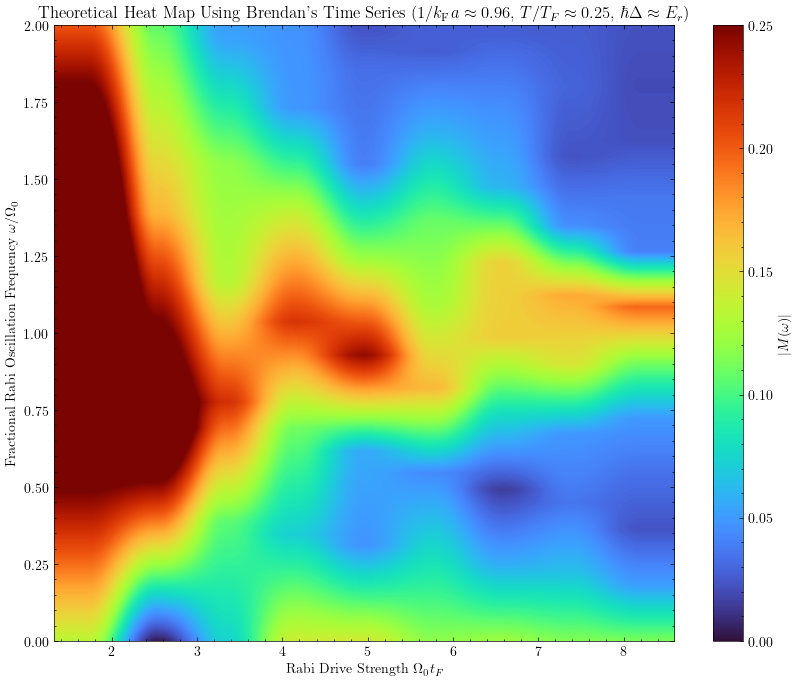

In [10]:
h = 6.62607015e-34  # J*s
ħ = h / (2*np.pi)
EF = h * 6.1 * 1e3
tF = ħ/EF

N_Ω0_exp = len(Ω0_tF_arr_exp)
N_ω_exp = 100001 #arbitary knob for deciding the frequency resolution of the plot; just has to be >=1001 as that's len(ω_tF_exp_arr) for in this case all Omega_0
max_ω_Ω0 = 2
ω_Ω0_arr_exp = np.linspace(0, max_ω_Ω0, N_ω_exp)

abs_M_hat_interp = np.zeros((N_Ω0_exp, N_ω_exp))
for i in range(N_Ω0_exp):
    t_tF, M = np.loadtxt("magnetization_time_series/repulsive_detuned/" + files[i], unpack=True)
    cg_mask = np.arange(0, len(t_tF), step=s) # conservative estimate here; in the actual experimental data, the sampling time varied from 0.46tF (at
    # the weakest drives) to 0.153tF (at the strongest drives)...is this an issue? Perhaps we should be using the same sampling time 0.153tF for all 
    # Omega_0 values?
    t_cg = t_tF[cg_mask]
    M_cg = M[cg_mask]
    mask_under10 = t_cg < 4   # mask based on original coarse-grained time array
    t_cg = t_cg[mask_under10]
    M_cg = M_cg[mask_under10]
    M_cg = M_cg + 0.05*np.random.normal(size=len(M_cg))
    M_hat = rfft(M_cg) / M_cg.size
    print(M_hat.shape)
    ω_tF_exp_arr = 2*np.pi * rfftfreq(M_cg.size, d=(t_cg[3]-t_cg[2])*tF) * tF
    ω_tF_arr_interp = ω_Ω0_arr_exp * Ω0_tF_arr_exp[i]
    abs_M_hat_interp[i, :] = np.interp(
        ω_tF_arr_interp,
        ω_tF_exp_arr,
        np.abs(M_hat),
        left=0,
        right=0
    )
    
# Method #1: plotting a raw heat map (no interpolation)
Ω0_tF_grid_exp, ω_Ω0_grid_exp = np.meshgrid(Ω0_tF_arr_exp, ω_Ω0_arr_exp, indexing="ij")
plt.figure(figsize=(10, 8))
c = plt.pcolormesh(
    Ω0_tF_grid_exp,
    ω_Ω0_grid_exp,
    abs_M_hat_interp,
    cmap="turbo",
    shading="auto",
    vmin=0,
    vmax=0.25
)
plt.xlabel(r"Rabi Drive Strength $\Omega_0 t_F$")
plt.ylabel(r"Fractional Rabi Oscillation Frequency $\omega / \Omega_0$")
plt.title(r"Theoretical Heat Map Using Brendan's Time Series ($1/k_{\text F}a\approx 0.96$, $T/T_F\approx 0.25$, $\hbar\Delta\approx E_r$)")
plt.colorbar(c, label=r"$|M(\omega)|$")
plt.show()

# Method #2: using plt.imshow (with interpolation)
plt.figure(figsize=(10, 8))
plt.imshow(
    abs_M_hat_interp.T, 
    aspect='auto',
    cmap='turbo',
    extent=[Ω0_tF_arr_exp.min(), Ω0_tF_arr_exp.max(), ω_Ω0_arr_exp.min(), ω_Ω0_arr_exp.max()],
    origin='lower', 
)

plt.colorbar(label=r'$|M(\omega)|$')
plt.clim(0, 0.25)
plt.xlabel(r"Rabi Drive Strength $\Omega_0 t_F$")
plt.ylabel(r"Fractional Rabi Oscillation Frequency $\omega / \Omega_0$")
plt.title(r"Theoretical Heat Map Using Brendan's Time Series ($1/k_{\text F}a\approx 0.96$, $T/T_F\approx 0.25$, $\hbar\Delta\approx E_r$)")
plt.show()